# Reading Raw Data

## Samples, Frames, and Timestamps

A **sample** is a 16-bit signed measurement from a single electrode. A **frame** contains a single sample from each of the 64 electrodes. The system runs at a fixed 25,000 frames per second - one every 40 µs.

To convert the raw sample value to µV, multiply it by `0.195`.

Each frame is allocated a numeric idenfifier called a **timestamp**. Timestamps increase by one for each frame.

You can always get the current timestamp by calling `neurons.timestamp()`:

In [1]:
import cl
import time

with cl.open() as neurons:
    first_timestamp = neurons.timestamp()
    
    # Wait for (at least) 1 second
    time.sleep(1)
    
    second_timestamp = neurons.timestamp()
    
print(f"The first timestamp was {first_timestamp},")
print(f"and the second timestamp was {second_timestamp}.")
print()
print(f"The difference was {second_timestamp - first_timestamp}.")

The first timestamp was 596386509,
and the second timestamp was 596411510.

The difference was 25001.


## Reading Live Data

An API is provided to read an arbitrary number of frames of raw samples from a recent or future timestamp. For example, to read a single frame from the current timestamp:

In [2]:
import cl

with cl.open() as neurons:
    frame = neurons.read(1, neurons.timestamp())

print(frame)

[[   0    8   42 -267  185  236  -18    0    2   21  217    4  -50 -110
  -179 -176    2  333  -79 -105  287  226 -148   47  236  -12  504  244
   -99 -234   85 -148   91  249  -43  217 -147  120    4  150   34  160
   -45  368  119  248  -58 -239  119    4  156  -22  136  299  380 -163
     0   23  226 -127  267  -36  -77    0]]


And to read 25,000 frames:

In [3]:
import cl

with cl.open() as neurons:
    frames = neurons.read(25000, neurons.timestamp())

print(frames)

[[  0  21  96 ...   5 -78   0]
 [  0  13  69 ...  15 -90   0]
 [  0  22  86 ...  10 -86   0]
 ...
 [  0  10  68 ...  26 -98   0]
 [  0  40  75 ...  42 -88   0]
 [  0  22  54 ...  42 -83   0]]


If you run these cells yourself, you'll notice that it takes about a second to read 25,000 frames. That is because we started our read from the current timestamp, which means it had to wait for 25,000 new frames to arrive.

It is possible to read from up to 5 seconds in the past:

In [4]:
import cl

with cl.open() as neurons:
    frames = neurons.read(25000, neurons.timestamp() - 25000)

print(frames)

[[   0   10   21 ...  -35  -68    0]
 [   0   -4   21 ...   -6  -46    0]
 [   0   26   85 ...   20  -27    0]
 ...
 [   0   49   93 ...   11  -87    0]
 [   0   55   68 ...    5  -84    0]
 [   0   34   53 ...   -8 -113    0]]


Which you will notice completes immediately.

It's also possible to wait for a future timestamp to read from. This example reads a single frame, but waits 25000 frames before doing so:

In [5]:
import cl

with cl.open() as neurons:
    frames = neurons.read(1, neurons.timestamp() + 25000)

print(frames)

[[   0   64   74 -233  190  252   32    0   72   20  256   84    1  -83
  -194 -143   74  364  -58  -66  267  247  -92   83  249   21  520  237
   -38 -222  122 -170  162  247  -40  224 -131   58   18  156   46  228
    12  347  106  228  -22 -238  139   -4  177   -8  188  368  393 -194
     0   34  237  -87  268   52  -83    0]]


## Plotting Something

This example captures frames for 10ms (250 frames), and then plots one of the channels the result using matplotlib:

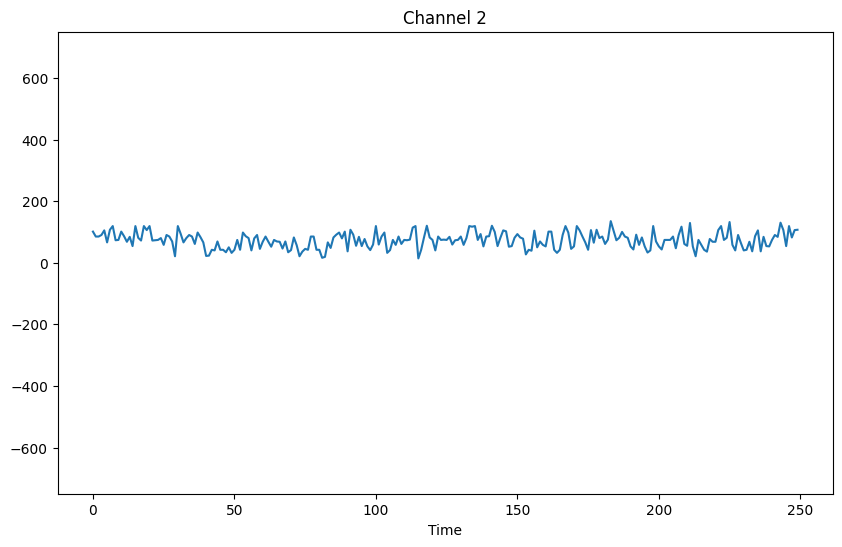

In [6]:
import cl
import matplotlib.pyplot as plt

CAPTURE_MS     = 10
CAPTURE_FRAMES = int(25000 / 1000 * CAPTURE_MS)
CHANNEL        = 2

with cl.open() as neurons:
    frames = neurons.read(CAPTURE_FRAMES, neurons.timestamp())

#
# Plot one of the channels
#

channel_frames = frames[:, CHANNEL]

plt.figure(figsize=(10, 6))
plt.ylim(-750, 750)
plt.plot(channel_frames, label=f'Channel {CHANNEL}')
plt.title(f'Channel {CHANNEL}')
plt.xlabel('Time')
plt.show()